In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [44]:
# Implementation of the multiclass hand digit classification using Keras
# The dataset is the MNIST
# Author: Muhammad Humayun Khan

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,InputLayer,Flatten

In [45]:
# load dataset
dataset = keras.datasets.mnist.load_data()       # load mnist dataset from the keras datasets
(X_train,y_train),(X_test,y_test) = dataset

X_train.shape   # 3D array, 60000 images with 28x28

(60000, 28, 28)

In [46]:
X_train[0].shape   # first image is of 28x28

(28, 28)

In [47]:
X_train[0]    # first image array with 28x28 pixels values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

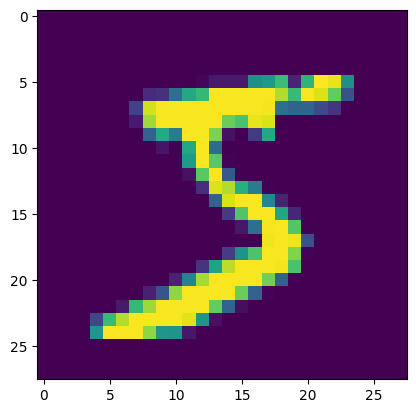

In [48]:
# display of the first image
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [49]:
X_test.shape    # 10000 images data for the test and 60000 images data for the traininig

(10000, 28, 28)

In [50]:
y_train    # images against the X_train or labels, first image is of 5, 2nd is of 0 etc

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [51]:
# scale the values for better weight conversion for the neural network
X_train = X_train/255
X_test = X_test/255

In [52]:
# create the neural architecture
model = Sequential()

# flatten the higher dimension array into 1D as input is in 28x28
model.add(Flatten(input_shape = (28,28)))       # 28x28 higher dimension array into 1D
model.add(Dense(128,activation = 'relu'))       # 128 perceptrons or nodes
model.add(Dense(10,activation = 'softmax'))     # for output use softmax when nodes greater than 10

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam')

In [64]:
# train the model
history = model.fit(X_train,y_train,epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0335 - val_loss: 0.1015
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0282 - val_loss: 0.0992
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0215 - val_loss: 0.1056
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0187 - val_loss: 0.1144
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0173 - val_loss: 0.1204
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0117 - val_loss: 0.1414
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0198 - val_loss: 0.1198
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0104 - val_loss: 0.1346
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0097 - val_loss: 0.1181
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0095 - val_loss: 0.1323


In [65]:
# prediction test for the model
model.predict(X_test)

# it predicts the most probability of the images on the index

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.9505985e-12, 6.5502709e-10, 7.5884316e-08, ..., 9.9999863e-01,
        5.0922178e-10, 9.1571160e-08],
       [4.6074696e-16, 2.6749065e-09, 9.9999994e-01, ..., 5.1248331e-15,
        6.5593326e-13, 1.5504629e-21],
       [1.3441443e-11, 9.9997538e-01, 8.7397282e-08, ..., 2.3527698e-05,
        3.7793214e-07, 1.0608313e-09],
       ...,
       [4.7874651e-24, 2.2897290e-12, 1.3094297e-16, ..., 1.2389459e-13,
        1.3211573e-13, 6.1713828e-12],
       [3.5941153e-13, 6.6057427e-15, 1.0816381e-21, ..., 7.3047460e-17,
        1.8225123e-11, 2.8071341e-14],
       [4.1083029e-14, 9.5653165e-16, 1.4500709e-15, ..., 2.3703684e-21,
        1.8911248e-13, 1.5016794e-18]], dtype=float32)

In [66]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [67]:
# to show the digit on the most indexes
y_pred = y_prob.argmax(axis = 1)
y_pred

# it shows first image is of 7, 2nd is of 2 and so on

array([7, 2, 1, ..., 4, 5, 6])

In [68]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9752

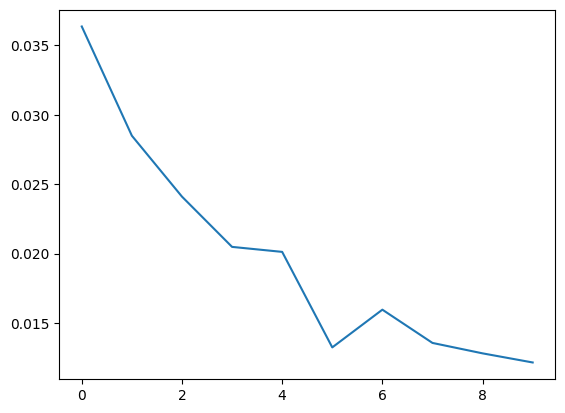

In [69]:
plt.plot(history.history['loss'])